Problem Set 4 — Saif Khawaja


In [ ]:
'''
Trains a simple convnet on the MNIST dataset.
Credit: Keras Team
'''
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# DEFINING *SOME* HYPERPARAMETERS
batch_size = 256
num_classes = 10
epochs = 2 

# DATA CLEAN-UP
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
def run_model(batch_size = 256, epochs = 2, lr=1e-3):
    # MODEL DEFINITION (some hardcodede hyperparameters)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.9))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.9))
    model.add(Dense(num_classes, activation='softmax'))

    # MODEL COMPILATION AND TRAINING
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=lr),
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(x_test, y_test))

    # MODEL EVALUATION
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score

Experiment 1: Now we change the number of epochs, keeping batch_size=256 and lr=1e-3

In [ ]:
epochs_grid = np.arange(2,73,10) # epochs = 2,12,22,32,42,52,62,72.
scores = np.zeros((len(epochs_grid), 2))
for i, e in enumerate(epochs_grid):
    scores[i, :] = run_model(batch_size = 256, epochs = e, lr=1e-3)
print(scores)

Test loss: 2.2973291873931885
Test accuracy: 0.2143000066280365
Test loss: 2.271655797958374
Test accuracy: 0.5273000001907349
Test loss: 2.1290171146392822
Test accuracy: 0.6675000190734863
Test loss: 1.9149818420410156
Test accuracy: 0.7576000094413757
Test loss: 1.3858134746551514
Test accuracy: 0.796500027179718
Test loss: 1.278963327407837
Test accuracy: 0.8144999742507935
Test loss: 0.8951471447944641
Test accuracy: 0.8726000189781189
Test loss: 0.7337367534637451
Test accuracy: 0.8888000249862671
[[2.29732919 0.21430001]
 [2.2716558  0.5273    ]
 [2.12901711 0.66750002]
 [1.91498184 0.75760001]
 [1.38581347 0.79650003]
 [1.27896333 0.81449997]
 [0.89514714 0.87260002]
 [0.73373675 0.88880002]]


Text(0, 0.5, 'test set accuracy')

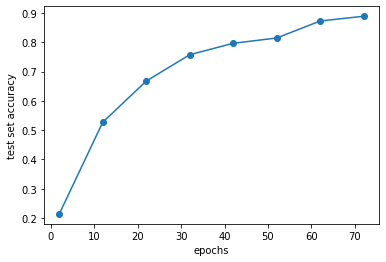

In [ ]:
plt.plot(epochs_grid, scores[:, 1], '-o')
plt.xlabel('epochs')
plt.ylabel('test set accuracy')

The test set accuracy increases with increasing number of epochs. The model is underfit when number of epochs is too small for this experiment.

Experiment 2: Now we change the learning rate, keeping epochs=40 and batch_size = 256.

In [ ]:
lr_grid = np.logspace(-5,0,8) # 1e-5 to 1 on a logspace
scores = np.zeros((len(lr_grid), 2))
for i, e in enumerate(lr_grid):
    scores[i, :] = run_model(batch_size = 256, epochs = 40, lr=e)

Test loss: 2.3028035163879395
Test accuracy: 0.09449999779462814
Test loss: 2.2945258617401123
Test accuracy: 0.27079999446868896
Test loss: 2.270235061645508
Test accuracy: 0.5410000085830688
Test loss: 1.047583818435669
Test accuracy: 0.8521999716758728
Test loss: 0.20524372160434723
Test accuracy: 0.955299973487854
Test loss: 0.08441634476184845
Test accuracy: 0.9764000177383423
Test loss: 0.070006363093853
Test accuracy: 0.978600025177002
Test loss: 2.302206039428711
Test accuracy: 0.11349999904632568


Text(0, 0.5, 'test set accuracy')

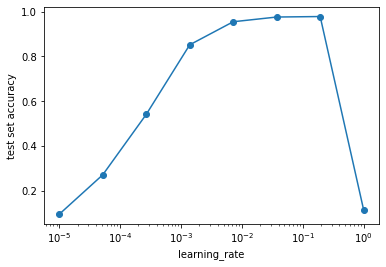

In [ ]:
plt.semilogx(lr_grid, scores[:, 1], '-o')
plt.xlabel('learning_rate')
plt.ylabel('test set accuracy')

The test set accuracy increases with learning rate first then decays quickly for too large learning rates. The optimized value is around 0.2, when the learning rate is too high, the optimization could not converge and the performance looks really bad.

Experiment 3: Now we change the batch_size, keeping epochs=20 and lr = 0.1.

In [ ]:
batch_grid = [32,64,128,256,512,1024,2048]
scores = np.zeros((len(batch_grid), 2))
for i, e in enumerate(batch_grid):
    scores[i, :] = run_model(batch_size = e, epochs = 20, lr=0.1)

Test loss: 0.49068760871887207
Test accuracy: 0.9057999849319458
Test loss: 0.10870302468538284
Test accuracy: 0.9717000126838684
Test loss: 0.0917593389749527
Test accuracy: 0.9750000238418579
Test loss: 0.09882358461618423
Test accuracy: 0.9736999869346619
Test loss: 0.12702372670173645
Test accuracy: 0.9670000076293945
Test loss: 0.15539495646953583
Test accuracy: 0.9628999829292297
Test loss: 0.2415427416563034
Test accuracy: 0.9501000046730042


Text(0, 0.5, 'test set accuracy')

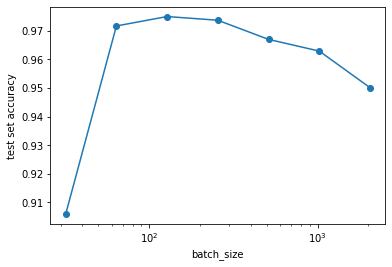

In [ ]:
plt.semilogx(batch_grid, scores[:, 1], '-o')
plt.xlabel('batch_size')
plt.ylabel('test set accuracy')

The test set accuracy does not depend on the batch_size sensitively. Batch sizes 128 and 256 yield the best performance.

In [ ]:
# if you are running this notebook on your local machine, install with pip
# !pip install pymagnitude

# if you are using Colab, install magnitude using the following:
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."
! wget http://magnitude.plasticity.ai/word2vec/light/GoogleNews-vectors-negative300.magnitude

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0   1030      0 --:--:-- --:--:-- --:--:--  1030
Done installing Magnitude.
--2021-04-29 00:19:31--  http://magnitude.plasticity.ai/word2vec/light/GoogleNews-vectors-negative300.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.217.45.27
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.217.45.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4211335168 (3.9G) [binary/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300.magnitude’

GoogleNews-vectors- 100%[===================>]   3.92G  51.9MB/s    in 85s     

2021-04-29 00:20:56 (47.3 MB/s) - ‘GoogleNews-vectors-negative300.magnitude’ saved [4211335168/4211335168]



In [ ]:
from pymagnitude import *

file_path = "GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)
print(vectors.distance("cat", "dog"))

0.69145405


1. What is the dimensionality of these word embeddings? Provide an integer answer.
2.  What are the top-5 most similar words to picnic (not including picnic itself)?
3. According to the word embeddings, which of these words is not like the others? `[tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazetteâ€™]`
4. Solve the following analogy: â€œleg is to jump as `X` is to throwâ€.
5. Is the word `alumni` in the vocabulary? What about `alumnus`?
6. How many words are in the vocabulary?

There are 3 million embeddings and each of them is a vector of 300:

In [ ]:
vectors.length, vectors.dim

(3000000, 300)

In [ ]:
vectors.distance("leg", "jump")

1.3187156

In [ ]:
vectors.distance("arm", "throw")

1.3216454

In [ ]:
vectors.most_similar('picnic')[:5]

[('picnics', 0.7400875),
 ('picnic_lunch', 0.7213739),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [ ]:
words = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [ ]:
vectors.doesnt_match(words)

'tissue'

In [ ]:
vectors.query('alumni')

array([-0.0213065,  0.0023583,  0.0448899,  0.1001891,  0.016915 ,
       -0.0422876, -0.0304146, -0.0793706,  0.0644073, -0.0474922,
        0.0283002,  0.0206559,  0.0312278,  0.0474922,  0.0161018,
        0.0152073,  0.0608291,  0.0650579, -0.0079696,  0.0543233,
        0.0273243,  0.1099478,  0.0949845, -0.0159392, -0.0178909,
       -0.0783947, -0.0627808,  0.0644073, -0.0442394, -0.0016468,
        0.0718889, -0.0705878, -0.0341554, -0.0191921,  0.1385733,
       -0.0364324,  0.1164536, -0.029276 ,  0.053998 ,  0.0650579,
        0.014638 ,  0.0299266, -0.1105984, -0.0507451,  0.0227703,
       -0.053998 , -0.0800212, -0.0995385,  0.026999 ,  0.0255352,
       -0.0173217, -0.0179722, -0.0221197,  0.111249 ,  0.0158579,
        0.0078069, -0.0105719,  0.0012452, -0.0044117, -0.0160205,
       -0.0050013, -0.0362698, -0.0059365, -0.0229329,  0.0122797,
       -0.0322036,  0.0186228,  0.0260231,  0.1255617,  0.0605038,
       -0.0523716,  0.0026023,  0.1053938, -0.1860655,  0.0328

In [ ]:
vectors.query('alumnus')

array([ 4.984350e-02,  3.068490e-02,  1.596550e-02,  2.741390e-02,
        6.573120e-02,  4.672830e-02, -2.741390e-02, -6.573120e-02,
        8.224180e-02, -3.177530e-02,  3.987480e-02, -3.566930e-02,
        3.520200e-02, -5.108960e-02, -9.719490e-02,  5.171270e-02,
        2.445450e-02, -1.884710e-02,  3.909600e-02,  6.510810e-02,
       -3.426740e-02,  1.956359e-01,  1.052945e-01, -4.672830e-02,
       -1.316180e-02, -1.588763e-01, -1.331760e-02,  2.289690e-02,
       -1.071636e-01,  2.367570e-02,  5.077810e-02, -1.508900e-03,
       -6.355050e-02,  6.571000e-04,  1.003101e-01, -2.133930e-02,
        1.277241e-01, -5.700850e-02, -1.845770e-02,  6.261590e-02,
        2.009320e-02,  8.138500e-03, -8.598010e-02, -8.470000e-04,
        3.286560e-02, -8.909530e-02, -9.594880e-02, -5.669700e-02,
        8.286490e-02, -3.816150e-02, -5.482790e-02,  1.736740e-02,
        1.837980e-02, -2.398720e-02,  4.174400e-02, -2.686900e-03,
        2.772550e-02, -2.663510e-02,  6.043530e-02, -5.482790e